In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys

In [3]:
sys.path.append("/home/jcordero/CMS/SMP_ZGamma_MCFM_Ana/")

In [4]:
from ConfigTh import ConfigTh
from ReaderTh import ReaderTh

Welcome to JupyROOT 6.18/04


/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/root_numpy/__init__.py:34: RuntimeWarning: ROOT 6.18/04 is currently active but you installed root_numpy against ROOT 6.05/02. Please consider reinstalling root_numpy for this ROOT version.
  RuntimeWarning)
/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.15.0 is currently installed but you installed root_numpy against numpy 1.12.1. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


In [5]:
from Common.CommonHelper import CommonHelper

In [6]:
config = {}
Reader = {}

In [7]:
era = "Zgamma"
selection = "mcfm"
path = "/home/jcordero/CMS/data/data_theory/"
config["mcfm"] = ConfigTh(path = path, selection = selection,era = era)
Reader["mcfm"] = ReaderTh(config["mcfm"])

In [8]:
era = "Zgamma"
selection = "matrix"
path = "/home/jcordero/CMS/data/data_theory/"
config["matrix"] = ConfigTh(path = path, selection = selection,era = era)
Reader["matrix"] = ReaderTh(config["matrix"])

In [9]:
def genCouplingList(coupling,index):
    couplingList = []
    for coup in coupling:
        for i in index:
            couplingList.append("h"+str(i)+coup)
    return couplingList

In [10]:
genCouplingList(["Z","gamma"],range(1,5))
xsec = {'mcfm':{},
        'matrix':{}
       }

In [11]:
orders = ["lo","nlo","nnlo"]
colors = {order:{} for order in orders}
        
colors['lo'] = {
                'sm':'k',
                'h1Z':'maroon',
                'h2Z':'darkorange',
                'h3Z':'darkgreen',
                'h4Z':'darkblue',
                'h1gamma':'firebrick',
                'h2gamma':'orange',
                'h3gamma':'green',
                'h4gamma':'blue',
                }
colors['nlo'] = {
                'sm':'gray',
                'h1Z':'red',
                'h2Z':'chocolate',
                'h3Z':'forestgreen',
                'h4Z':'royalblue',
                'h1gamma':'orangered',
                'h2gamma':'sandybrown',
                'h3gamma':'seagreen',
                'h4gamma':'cornflowerblue',
                }

colors['nnlo'] = {
                'sm':'darkgrey',
                'h1Z':'tomato',
                'h2Z':'peru',
                'h3Z':'limegreen',
                'h4Z':'deepskyblue',
                'h1gamma':'salmon',
                'h2gamma':'goldenrod',
                'h3gamma':'mediumseagreen',
                'h4gamma':'skyblue',
                }

In [12]:
markers = {
                'sm':'o',
                'h1Z':'v',
                'h2Z':'^',
                'h3Z':'1',
                'h4Z':'p',
                'h1gamma':'x',
                'h2gamma':'s',
                'h3gamma':'D',
                'h4gamma':'*',
                }

In [13]:
ntuple2matrix = {
                "photonOneP4":"pT_gamma",
                "leptonOneP4":"pT_lep2",
                "leptonTwoP4":"pT_lep2",
                 "dileptonPt":"pT_lep1_lep2",
    
                  "dileptonM":"m_lep1_lep2",
                       "llgM":"m_lep1_lep2_gamma",
    
                 "dileptonDR":"dR_em1_ep1",
                 "l1PhotonDR":"dR_lep1_gamma",
                 "dileptonPhotonDR":"",
    
                      "nJets":"n_jets",
                }

# 3 --> lep1
# 4 --> lep2
# 5 --> gamma
# 6 --> jet
ntuple2mcfm = {
                "photonOneP4":"pt5",
                "leptonOneP4":"pt3",
                "leptonTwoP4":"pt4",
                 "dileptonPt":"pt34",
    
                  "dileptonM":"boson_invariant_mass",
                       "llgM":"(Z,gam)_invariant_mass",
    
                 "dileptonDR":"",
                 "l1PhotonDR":"DeltaRe5",
                 "l2PhotonDR":"DeltaRea5",
                 "dileptonPhotonDR":"ydiff(Vgam)",
    
                      "nJets":"",
                }


In [14]:
#VAR = "photonOneP4"
#VAR = "dileptonPhotonDR"
VAR = "l1PhotonDR"

In [15]:
selection = "mcfm"
orders = ["lo","nlo","nnlo"]
var = ntuple2mcfm[VAR]
val = "0p5"

coupling_list = ["sm"] + genCouplingList(["Z","gamma"],range(1,5))

for order in orders:
    xsec[selection][order] = {}
    for coup in coupling_list:
        print(selection,order,coup)
        xsec[selection][order][coup] = Reader[selection].readTheory(selection,order,coup,val,var)
        xsec[selection][order][coup]["bins"] = CommonHelper.Plot.BinFormat(xsec[selection][order][coup]["bins"],Type="center")
        print(Reader[selection].pathtmp)


mcfm lo sm
/home/jcordero/CMS/data/data_theory/mcfm/Zgamma/lo/sm/Zgamma_lo_MMHT_nl_1____1____14TeV_DeltaRe5.txt
mcfm lo h1Z
/home/jcordero/CMS/data/data_theory/mcfm/Zgamma/lo/h1Z/0p5/Zgamma_lo_MMHT_nl_1____1____14TeV_DeltaRe5.txt
mcfm lo h2Z
/home/jcordero/CMS/data/data_theory/mcfm/Zgamma/lo/h2Z/0p5/Zgamma_lo_MMHT_nl_1____1____14TeV_DeltaRe5.txt
mcfm lo h3Z
/home/jcordero/CMS/data/data_theory/mcfm/Zgamma/lo/h3Z/0p5/Zgamma_lo_MMHT_nl_1____1____14TeV_DeltaRe5.txt
mcfm lo h4Z
/home/jcordero/CMS/data/data_theory/mcfm/Zgamma/lo/h4Z/0p5/Zgamma_lo_MMHT_nl_1____1____14TeV_DeltaRe5.txt
mcfm lo h1gamma
/home/jcordero/CMS/data/data_theory/mcfm/Zgamma/lo/h1gamma/0p5/Zgamma_lo_MMHT_nl_1____1____14TeV_DeltaRe5.txt
mcfm lo h2gamma
/home/jcordero/CMS/data/data_theory/mcfm/Zgamma/lo/h2gamma/0p5/Zgamma_lo_MMHT_nl_1____1____14TeV_DeltaRe5.txt
mcfm lo h3gamma
/home/jcordero/CMS/data/data_theory/mcfm/Zgamma/lo/h3gamma/0p5/Zgamma_lo_MMHT_nl_1____1____14TeV_DeltaRe5.txt
mcfm lo h4gamma
/home/jcordero/CMS/dat

In [16]:
xsec["mcfm"]["nlo"]["sm"]

{'bins': array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05,
        1.15, 1.25, 1.35, 1.45, 1.55, 1.65, 1.75, 1.85, 1.95, 2.05, 2.15,
        2.25, 2.35, 2.45, 2.55, 2.65, 2.75, 2.85, 2.95, 3.05, 3.15, 3.25,
        3.35, 3.45, 3.55, 3.65, 3.75, 3.85, 3.95, 4.05, 4.15, 4.25, 4.35,
        4.45, 4.55, 4.65, 4.75, 4.85, 4.95]),
 'xsec': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  17.920897,
  16.410773,
  15.511883,
  14.853138,
  14.648271,
  14.981958,
  15.066254,
  14.789524,
  15.080455,
  15.94861,
  16.08118,
  17.010295,
  17.50273,
  19.138378,
  19.658189,
  20.71988,
  21.827963,
  23.187408,
  24.127824,
  25.164513,
  25.59812,
  25.499797,
  25.108813,
  25.047756,
  22.000316,
  13.188941,
  9.9447399,
  8.2794112,
  6.2872678,
  5.3431075,
  4.5146147,
  3.5230495,
  3.2700723,
  2.4407464,
  2.0530592,
  1.7905303,
  1.5097702,
  1.0738895,
  0.89242053,
  0.64416974,
  0.57289028,
  0.34320019,
  0.31480208],
 'err': [0.0,
  0.0,
  0.0,
  0.0

In [17]:
#Reader[selection].readTheory(selection,'nlo','h2Z',"0p05",'pt5')
#Reader[selection].getXsec(selection, Reader[selection].pathtmp)

In [18]:
def setXlims(ax,selection,VAR):
    if "P4" in VAR or "M" in VAR:
        ax.set_xlim([0,500])
        ax.set_ylim([0,5])
    elif "DR" in VAR:
        ax.set_xlim([0,5])
def setYlims(ax,selection, VAR):
    if "P4" in VAR or "M" in VAR:
        ax.set_ylim([0,20])
    elif "DR" in VAR:
        if selection == "mcfm":
            ax.set_ylim([0,14])
        #elif selection == "matrix":
        #    ax.set_ylim([0,1000])

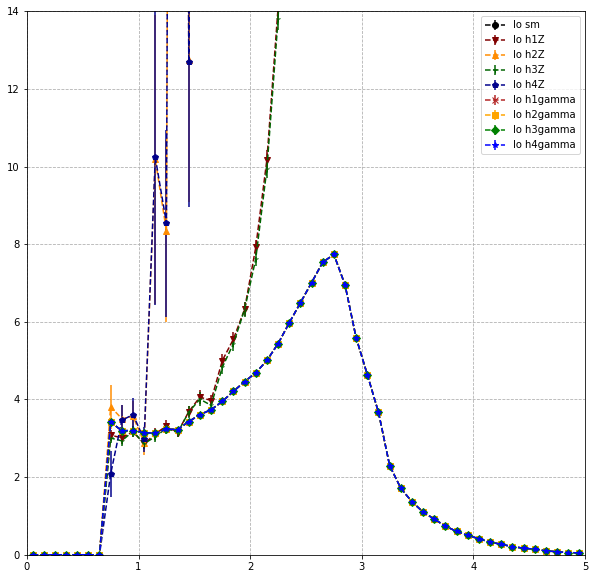

In [19]:
plt.figure(figsize=(10,10))
plt.grid(linestyle = "--")

selection = "mcfm"
order = 'lo'
for coupl in coupling_list:
    if coupl == "sm":
        marker = 'o'
    else:
        marker = None
    plt.errorbar(xsec[selection][order][coupl]["bins"],
                 xsec[selection][order][coupl]["xsec"],
                 yerr = xsec[selection][order][coupl]["err"],
                 color = colors[order][coupl],
                 marker = markers[coupl],
                 label = order + " " + coupl,
                 linestyle = '--',
                )
ax = plt.gca()
setXlims(ax,selection, VAR)
setYlims(ax,selection, VAR)
plt.legend()

In [28]:
#xsec = Reader.readTheory(selection,"nlo","h4Z","0p5","boson_invariant_mass")

selection = "matrix"
order = "lo"
var = ntuple2matrix[VAR]
val = "0p5"

coupling_list = ["sm"] 

for order in orders:
    xsec[selection][order] = {}
    for coup in coupling_list:
        xsec[selection][order][coup] = Reader[selection].readTheory(selection,order,coup,val,var)
        #xsec[selection][order][coup]["bins"] = CommonHelper.Plot.BinFormat(xsec[selection][order][coup]["bins"],Type="center")
        print(Reader[selection].pathtmp)


/home/jcordero/CMS/data/data_theory/matrix/Zgamma/lo/sm/dR_lep1_gamma__LO.dat
/home/jcordero/CMS/data/data_theory/matrix/Zgamma/nlo/sm/dR_lep1_gamma__NLO.dat
/home/jcordero/CMS/data/data_theory/matrix/Zgamma/nnlo/sm/dR_lep1_gamma__NNLO.dat


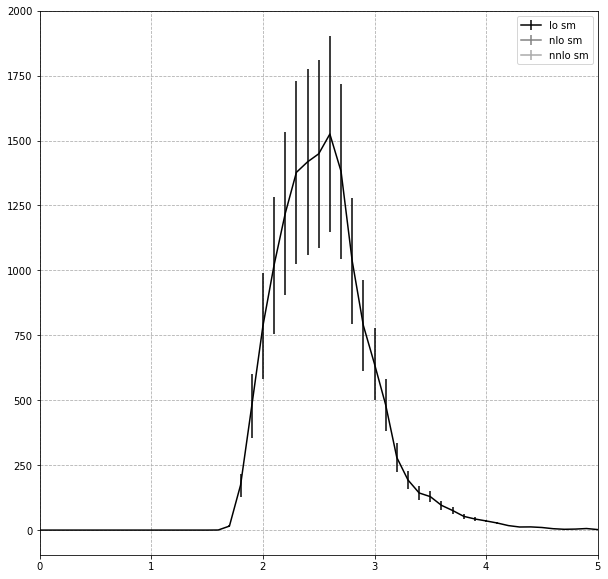

In [29]:
plt.figure(figsize=(10,10))
plt.grid(linestyle = "--")

selection = "matrix"
for order in orders:
    for coupl in coupling_list:
        plt.errorbar(xsec[selection][order][coupl]["bins"],
                     xsec[selection][order][coupl]["xsec"],
                     yerr = np.diff(xsec[selection][order][coupl]["err"]),
                     color = colors[order][coupl],
                     label = order + " " + coupl,
                    )
ax = plt.gca()
setXlims(ax,selection,VAR)
setYlims(ax,selection,VAR)
plt.legend()

In [22]:
xsec['matrix']

{'lo': {'sm': {'bins': [0.0,
    0.1,
    0.2,
    0.3,
    0.4,
    0.5,
    0.6,
    0.7,
    0.8,
    0.9,
    1.0,
    1.1,
    1.2,
    1.3,
    1.4,
    1.5,
    1.6,
    1.7,
    1.8,
    1.9,
    2.0,
    2.1,
    2.2,
    2.3,
    2.4,
    2.5,
    2.6,
    2.7,
    2.8,
    2.9,
    3.0,
    3.1,
    3.2,
    3.3,
    3.4,
    3.5,
    3.6,
    3.7,
    3.8,
    3.9,
    4.0,
    4.1,
    4.2,
    4.3,
    4.4,
    4.5,
    4.6,
    4.7,
    4.8,
    4.9,
    5.0,
    5.1,
    5.2,
    5.3,
    5.4,
    5.5,
    5.6,
    5.7,
    5.8,
    5.9,
    6.0,
    6.1,
    6.2,
    6.3,
    6.4,
    6.5,
    6.6,
    6.7,
    6.8,
    6.9,
    7.0,
    7.1,
    7.2,
    7.3,
    7.4,
    7.5,
    7.6,
    7.7,
    7.8,
    7.9,
    8.0,
    8.1,
    8.2,
    8.3,
    8.4,
    8.5,
    8.6,
    8.7,
    8.8,
    8.9,
    9.0,
    9.1,
    9.2,
    9.3,
    9.4,
    9.5,
    9.6,
    9.7,
    9.8,
    9.9,
    10.0],
   'xsec': [0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0

In [23]:
Reader[selection].readTheory(selection,order,coup,"0p05",var)

{'bins': [], 'xsec': [], 'err': [], 'ranges': []}

In [24]:
coupling_list = ["sm"] + genCouplingList(["Z","gamma"],range(1,5))

In [25]:
order = 'lo'
Reader[selection].readTheory(selection,order,coup,"0p05",var)

{'bins': [0.0,
  0.1,
  0.2,
  0.3,
  0.4,
  0.5,
  0.6,
  0.7,
  0.8,
  0.9,
  1.0,
  1.1,
  1.2,
  1.3,
  1.4,
  1.5,
  1.6,
  1.7,
  1.8,
  1.9,
  2.0,
  2.1,
  2.2,
  2.3,
  2.4,
  2.5,
  2.6,
  2.7,
  2.8,
  2.9,
  3.0,
  3.1,
  3.2,
  3.3,
  3.4,
  3.5,
  3.6,
  3.7,
  3.8,
  3.9,
  4.0,
  4.1,
  4.2,
  4.3,
  4.4,
  4.5,
  4.6,
  4.7,
  4.8,
  4.9,
  5.0,
  5.1,
  5.2,
  5.3,
  5.4,
  5.5,
  5.6,
  5.7,
  5.8,
  5.9,
  6.0,
  6.1,
  6.2,
  6.3,
  6.4,
  6.5,
  6.6,
  6.7,
  6.8,
  6.9,
  7.0,
  7.1,
  7.2,
  7.3,
  7.4,
  7.5,
  7.6,
  7.7,
  7.8,
  7.9,
  8.0,
  8.1,
  8.2,
  8.3,
  8.4,
  8.5,
  8.6,
  8.7,
  8.8,
  8.9,
  9.0,
  9.1,
  9.2,
  9.3,
  9.4,
  9.5,
  9.6,
  9.7,
  9.8,
  9.9,
  10.0],
 'xsec': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.33875487,
  15.372745,
  173.42566,
  477.6248,
  785.83268,
  1020.2643,
  1219.1277,
  1377.5177,
  1418.0097,
  1448.9322,
  1525.0838,
  1382.0146,
  1036.

In [26]:
xsec[selection][order]['sm']

{'bins': [0.0,
  0.1,
  0.2,
  0.3,
  0.4,
  0.5,
  0.6,
  0.7,
  0.8,
  0.9,
  1.0,
  1.1,
  1.2,
  1.3,
  1.4,
  1.5,
  1.6,
  1.7,
  1.8,
  1.9,
  2.0,
  2.1,
  2.2,
  2.3,
  2.4,
  2.5,
  2.6,
  2.7,
  2.8,
  2.9,
  3.0,
  3.1,
  3.2,
  3.3,
  3.4,
  3.5,
  3.6,
  3.7,
  3.8,
  3.9,
  4.0,
  4.1,
  4.2,
  4.3,
  4.4,
  4.5,
  4.6,
  4.7,
  4.8,
  4.9,
  5.0,
  5.1,
  5.2,
  5.3,
  5.4,
  5.5,
  5.6,
  5.7,
  5.8,
  5.9,
  6.0,
  6.1,
  6.2,
  6.3,
  6.4,
  6.5,
  6.6,
  6.7,
  6.8,
  6.9,
  7.0,
  7.1,
  7.2,
  7.3,
  7.4,
  7.5,
  7.6,
  7.7,
  7.8,
  7.9,
  8.0,
  8.1,
  8.2,
  8.3,
  8.4,
  8.5,
  8.6,
  8.7,
  8.8,
  8.9,
  9.0,
  9.1,
  9.2,
  9.3,
  9.4,
  9.5,
  9.6,
  9.7,
  9.8,
  9.9,
  10.0],
 'xsec': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.33875487,
  15.372745,
  173.42566,
  477.6248,
  785.83268,
  1020.2643,
  1219.1277,
  1377.5177,
  1418.0097,
  1448.9322,
  1525.0838,
  1382.0146,
  1036.

In [27]:
print(len(xsec[selection][order][coupl]["bins"]),
len(xsec[selection][order][coupl]["xsec"]))

101 101
